# Code Plateau Automobile Company Project 

## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the Nigerian market by setting up its manufacturing unit and producing cars locally to compete with their Nigerian, US and European counterparts.
They have contacted you, a Data Scientist to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the Nigerian market, since those may be very different from the Chinese market. 
> The company wants to know:
 - Which variables are significant in predicting the price of a car
 - How well do those variables describe the price of a car
 
Based on various market surveys, you have gathered a large data set of different types of cars across the Nigerian market.


## Objective 

You are required to model the price of cars with the available independent variables. The management will use it to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Dictionary
 - Car_ID - Unique id of each observation (Interger)
 - Symboling - Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
 - carCompany - Name of car company (Categorical)
 - fueltype - Car fuel type i.e gas or diesel (Categorical)
 - aspiration - Aspiration used in a car (Categorical)
 - doornumber - Number of doors in a car (Categorical)
 - carbody - body of car (Categorical)
 - drivewheel - type of drive wheel (Categorical)
 - enginelocation	- Location of car engine (Categorical)
 - wheelbase - Weelbase of car (Numeric)	
 - carlength - Length of car (Numeric)
 - carwidth - Width of car (Numeric)
 - carheight - height of car (Numeric)
 - curbweight - The weight of a car without occupants or baggage. (Numeric)
 - enginetype - Type of engine. (Categorical
 - cylindernumber - cylinder placed in the car (Categorical)	
 - enginesize - Size of car (Numeric)
 - fuelsystem - Fuel system of car (Categorical)
 - boreratio - Boreratio of car (Numeric)		
 - stroke - Stroke or volume inside the engine (Numeric)	
 - compressionratio - compression ratio of car (Numeric)	
 - horsepower - Horsepower (Numeric)		
 - peakrpm - car peak rpm (Numeric) 
 - citympg	 - Mileage in city (Numeric)
 - highwaympg - Mileage on highway (Numeric)	
 - price(Dependent variable) - Price of car (Numeric)

### Importing the necessary libraries for data investigation

In [135]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [136]:
# importing the dataset
plt_dataset = pd.read_csv('CarPrice_data.csv')

In [137]:
plt_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [138]:
## Droping Car ID as its not important in the dataset
plt_dataset = plt_dataset.drop(['car_ID'], axis=1)

In [139]:
# assessing the data description
plt_dataset.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Cleaning the data

In [140]:
plt_dataset.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [141]:
# investigating duplicate values in the dataset
plt_dataset.duplicated().sum()

0

In [142]:
# dropping the car id variable in the dataset
plt_dataset.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

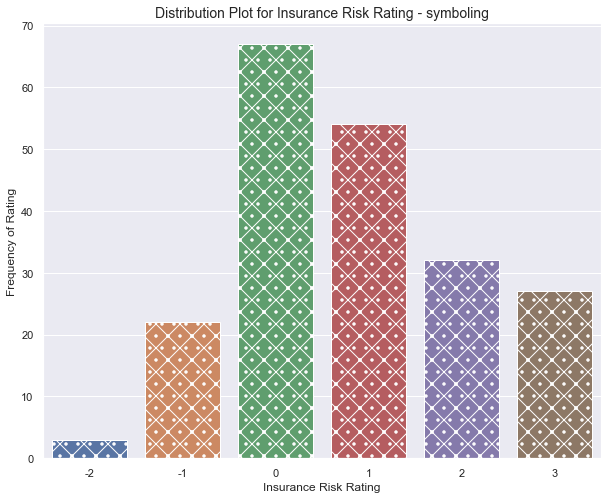

In [143]:
plt.figure(figsize=(10,8))
sns.countplot(data=plt_dataset, x= 'symboling', hatch=".x")
plt.title("Distribution Plot for Insurance Risk Rating - symboling", fontsize=14)
plt.xlabel('Insurance Risk Rating')
plt.ylabel("Frequency of Rating")

plt.show()

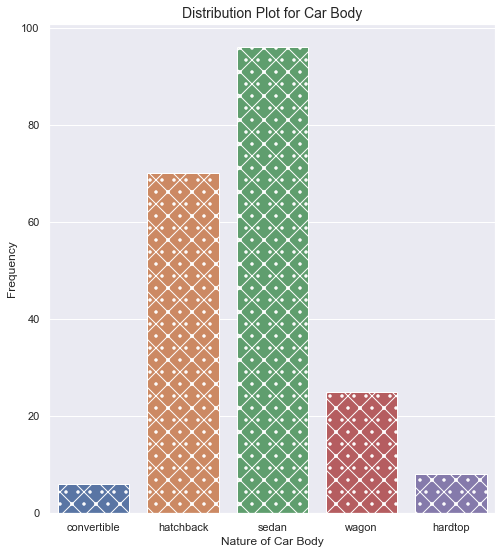

In [144]:
plt.figure(figsize=(8,9))
sns.countplot(data=plt_dataset, x='carbody',hatch=".x")
plt.title("Distribution Plot for Car Body", fontsize=14)
plt.xlabel("Nature of Car Body")
plt.ylabel("Frequency")

plt.show()

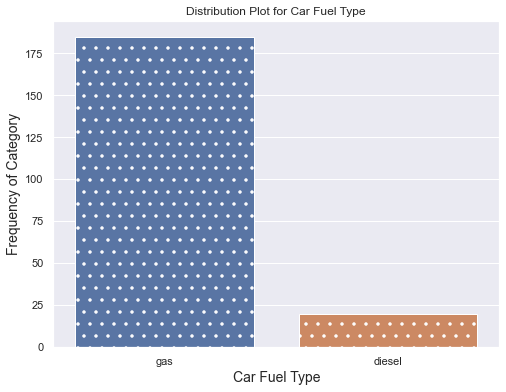

In [145]:
plt.figure(figsize=(8,6))
sns.countplot(data=plt_dataset, x='fueltype',hatch=".y")
plt.title("Distribution Plot for Car Fuel Type")
plt.xlabel('Car Fuel Type', fontsize=14)
plt.ylabel("Frequency of Category", fontsize=14)

plt.show()

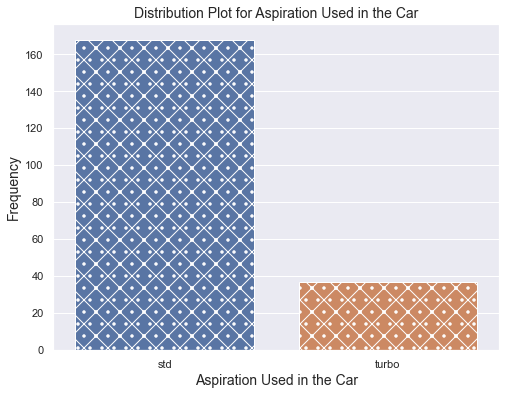

In [146]:
plt.figure(figsize=(8,6))
sns.countplot(data=plt_dataset, x='aspiration',hatch=".x")
plt.title("Distribution Plot for Aspiration Used in the Car", fontsize=14)
plt.xlabel("Aspiration Used in the Car", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

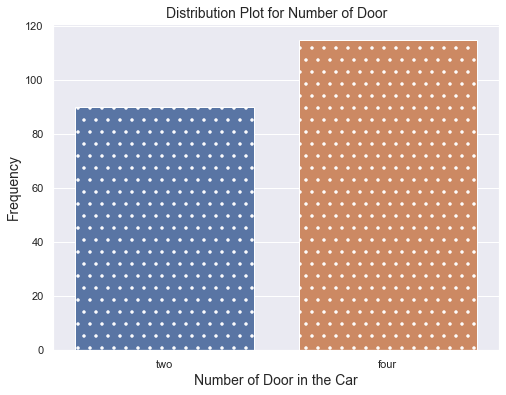

In [147]:
plt.figure(figsize=(8,6))
sns.countplot(data=plt_dataset, x='doornumber',hatch=".y")
plt.title("Distribution Plot for Number of Door", fontsize=14)
plt.xlabel("Number of Door in the Car", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

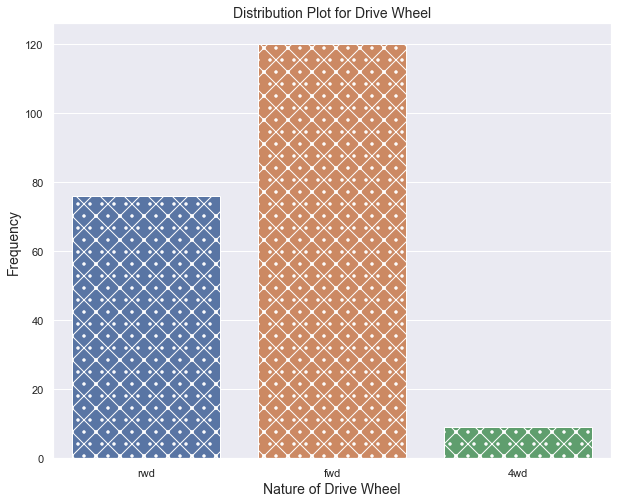

In [148]:
plt.figure(figsize=(10,8))
sns.countplot(data=plt_dataset, x='drivewheel',hatch=".x")
plt.title("Distribution Plot for Drive Wheel", fontsize=14)
plt.xlabel("Nature of Drive Wheel", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

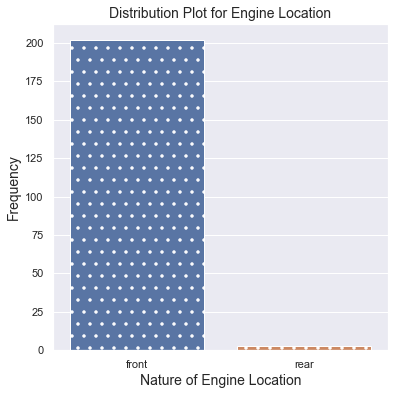

In [149]:
plt.figure(figsize=(6,6))
sns.countplot(data=plt_dataset, x='enginelocation',hatch=".y")
plt.title("Distribution Plot for Engine Location", fontsize=14)
plt.xlabel("Nature of Engine Location", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

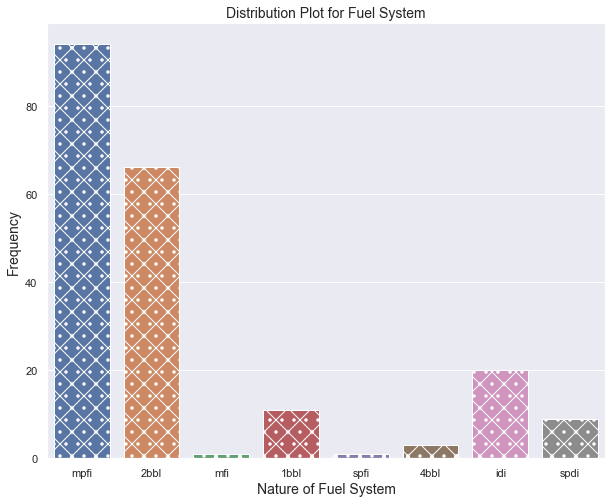

In [150]:
plt.figure(figsize=(10,8))
sns.countplot(data=plt_dataset, x='fuelsystem',hatch=".x")
plt.title("Distribution Plot for Fuel System", fontsize=14)
plt.xlabel("Nature of Fuel System", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

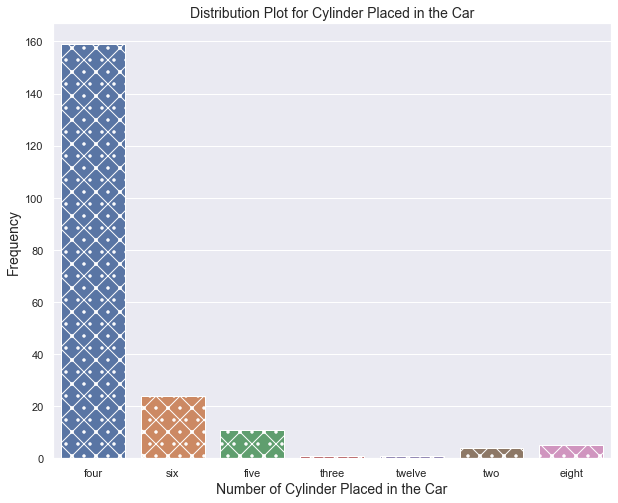

In [151]:
plt.figure(figsize=(10,8))
sns.countplot(data=plt_dataset, x='cylindernumber',hatch=".x")
plt.title("Distribution Plot for Cylinder Placed in the Car", fontsize=14)
plt.xlabel("Number of Cylinder Placed in the Car", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

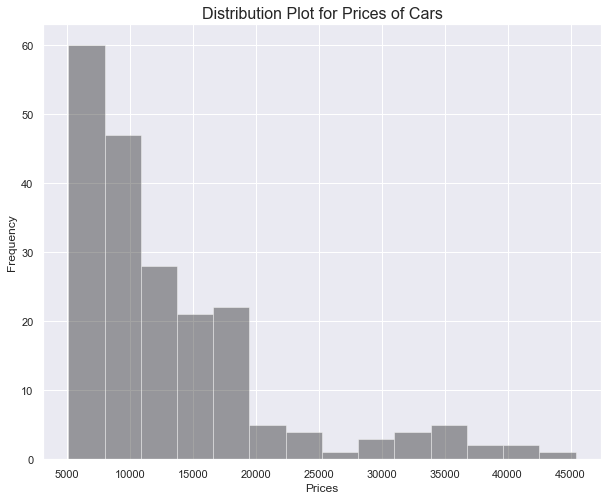

In [152]:
#distribution plot
plt.figure(figsize=(10,8))
# sns.FacetGrid(raw_dataset,height=5).map(sns.distplot,"price").add_legend()
sns.distplot(plt_dataset['price'], hist=True, kde=False, color='k')
plt.title("Distribution Plot for Prices of Cars", fontsize=16)
plt.xlabel("Prices", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

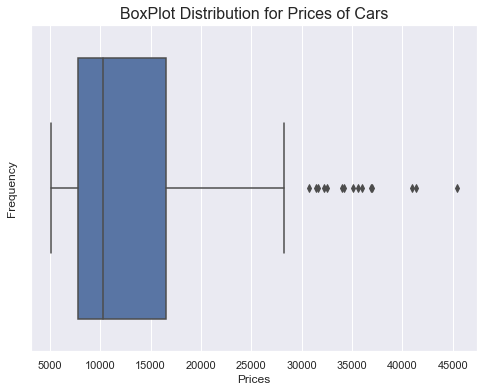

In [153]:
# boxplot for the prices of cars
plt.figure(figsize=(8,6))
sns.boxplot(x='price', data=plt_dataset)
plt.title("BoxPlot Distribution for Prices of Cars", fontsize=16)
plt.xlabel("Prices", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

## Bivariate Analysis

In [154]:
# create dictionary of aggregations ie numeric value 
aggregations=(
    {
        'wheelbase':max, # minimum height of car in each group
        'carlength':max, # maximum height of car in each group
        'carwidth':max,
        'carheight':max,
        'price': 'mean', # average price of car in each group
    }
)
# implementing aggregations in groups of three
plt_dataset.groupby(
 ["carbody","drivewheel", "enginetype"]
).agg(aggregations)


wheelbase  carlength  carwidth  carheight  \
carbody     drivewheel enginetype                                              
convertible fwd        ohc              94.5      159.3      64.2       55.6   
            rwd        dohc             88.6      168.8      64.1       48.8   
                       ohc              98.4      176.2      65.6       53.0   
                       ohcf             89.5      168.9      65.0       51.6   
                       ohcv             96.6      180.3      70.5       50.8   
hardtop     fwd        ohc              95.1      162.4      63.8       53.3   
            rwd        ohc             106.7      187.5      70.3       54.9   
                       ohcf             89.5      168.9      65.0       51.6   
                       ohcv            112.0      199.2      72.0       55.4   
hatchback   4wd        ohc              99.5      178.2      67.9       52.0   
                       ohcf             93.3      157.3      63.8       55.7   
            fwd        dohc             99.1      186.6      66.5       56.1   
                       l                88.4      141.1      60.3       53.2   
                       ohc             102.4      186.6      66.6       56.1   
                       ohcf             93.7      157.9      63.6       53.7   
            rwd        dohc            102.9      183.5      67.7       52.6   
                       dohcv            98.4      175.7      72.3       50.5   
                       ohc             102.7      178.4      68.3       54.8   
                       ohcv             99.2      178.5      67.9       52.4   
                       rotor            95.3      169.0      65.7       49.6   
sedan       4wd        ohc              99.4      176.6      66.4       54.3   
                       ohcf             97.0      172.0      65.4       54.3   
            fwd        dohc             99.1      186.6      66.5       56.1   
                       ohc             105.8      192.7      71.4       56.1   
                       ohcf             97.2      172.0      65.4       52.5   
                       ohcv            100.4      184.6      66.5       55.1   
            rwd        dohc            113.0      199.6      69.6       54.1   
                       l               108.0      186.7      68.4       56.7   
                       ohc             115.6      202.6      71.7       56.5   
                       ohcv            120.9      208.1      71.7       56.7   
wagon       4wd        ohc              95.7      169.7      63.6       59.1   
                       ohcf             96.9      173.6      65.4       54.9   
            fwd        ohc             105.8      192.7      71.4       59.8   
                       ohcf             97.0      173.5      65.4       53.0   
                       ohcv            100.4      184.6      66.5       56.1   
            rwd        dohc            104.5      187.8      66.5       54.1   
                       l               114.2      198.9      68.4       58.7   
                       ohc             110.0      190.9      70.3       58.7   

                                          price  
carbody     drivewheel enginetype                
convertible fwd        ohc         11595.000000  
            rwd        dohc        14997.500000  
                       ohc         17669.000000  
                       ohcf        37028.000000  
                       ohcv        35056.000000  
hardtop     fwd        ohc          8249.000000  
            rwd        ohc         14365.750000  
                       ohcf        33278.000000  
                       ohcv        45400.000000  
hatchback   4wd        ohc         17859.167000  
                       ohcf         7603.000000  
            fwd        dohc        18150.000000  
                       l            5151.000000  
                       ohc          8354.466667  
                       ohcf       

In [155]:
plt_dataset.groupby(
    ["carbody","drivewheel", "enginetype"]).agg(
     # Get max of the price column for each group
     max_price=('price', max),
     # Get min of the price column for each group
     min_price=('price', min),
     # Get sum of the price column for each group
     total_price=('price', 'mean')
)


max_price  min_price   total_price
carbody     drivewheel enginetype                                    
convertible fwd        ohc         11595.000  11595.000  11595.000000
            rwd        dohc        16500.000  13495.000  14997.500000
                       ohc         17669.000  17669.000  17669.000000
                       ohcf        37028.000  37028.000  37028.000000
                       ohcv        35056.000  35056.000  35056.000000
hardtop     fwd        ohc          8249.000   8249.000   8249.000000
            rwd        ohc         28176.000   8449.000  14365.750000
                       ohcf        34028.000  32528.000  33278.000000
                       ohcv        45400.000  45400.000  45400.000000
hatchback   4wd        ohc         17859.167  17859.167  17859.167000
                       ohcf         7603.000   7603.000   7603.000000
            fwd        dohc        18150.000  18150.000  18150.000000
                       l            5151.000   5151.000   5151.000000
                       ohc         15040.000   5195.000   8354.466667
                       ohcf         7053.000   5118.000   6085.500000
            rwd        dohc        16558.000   9538.000  14031.333333
                       dohcv       31400.500  31400.500  31400.500000
                       ohc         22018.000   8238.000  13158.428571
                       ohcv        19699.000  16500.000  17949.250000
                       rotor       15645.000  10945.000  13020.000000
sedan       4wd        ohc         17450.000  17450.000  17450.000000
                       ohcf        11259.000   9233.000  10246.000000
            fwd        dohc        18620.000  18620.000  18620.000000
                       ohc         23875.000   5499.000   9549.078431
                       ohcf         9960.000   7126.000   8287.000000
                       ohcv        13499.000  13499.000  13499.000000
            rwd        dohc        35550.000   9298.000  23197.000000
                       l           18150.000  11900.000  15758.571429
                       ohc         41315.000   6785.000  21233.285714
                       ohcv        40960.000  21485.000  33157.250000
wagon       4wd        ohc          8778.000   7898.000   8338.000000
                       ohcf        11694.000   8013.000   9853.500000
            fwd        ohc         18920.000   6918.000   9767.555556
                       ohcf        10198.000   7463.000   8830.500000
                       ohcv        14399.000  14399.000  14399.000000
            rwd        dohc        15750.000  15750.000  15750.000000
                       l           17075.000  12440.000  15017.500000
                       ohc         28248.000  13415.000  19282.000000

Text(0.5, 0, 'Price')

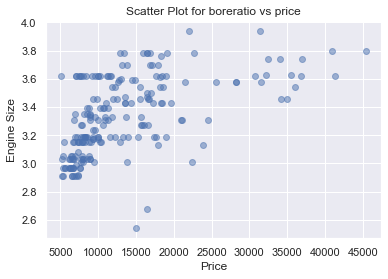

In [156]:
# plot the relationship between “boreratio” and ”price”
plt.scatter(plt_dataset["price"], plt_dataset["boreratio"], alpha=0.5)
plt.title("Scatter Plot for boreratio vs price")
plt.ylabel("Engine Size")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

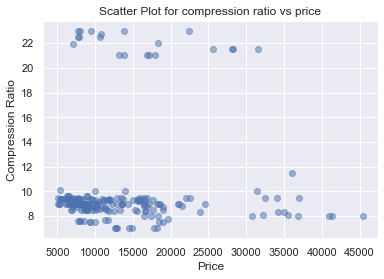

In [157]:
# plot the relationship between “compressionratio” and ”price”
plt.scatter(raw_dataset["price"], raw_dataset["compressionratio"], alpha=0.5)
plt.title("Scatter Plot for compression ratio vs price")
plt.ylabel("Compression Ratio")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

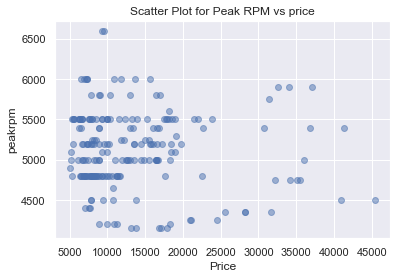

In [158]:
# plot the relationship between “peakrpm” and ”price”
plt.scatter(raw_dataset["price"], raw_dataset["peakrpm"], alpha=0.5)
plt.title("Scatter Plot for Peak RPM vs price")
plt.ylabel("peakrpm")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

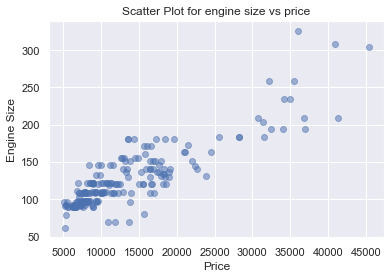

In [159]:
# plot the relationship between “horsepower” and ”price”
plt.scatter(raw_dataset["price"], raw_dataset["enginesize"], alpha=0.5)
plt.title("Scatter Plot for engine size vs price")
plt.ylabel("Engine Size")
plt.xlabel("Price")

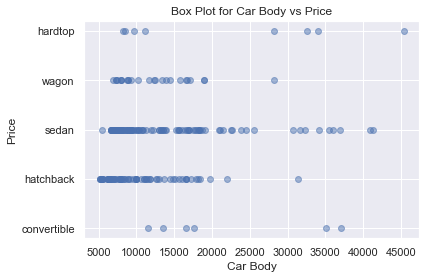

In [160]:
#boxplot
plt.scatter(plt_dataset["price"], plt_dataset["carbody"], alpha=0.5)
# sns.boxplot(x="carbody", y="price", data=plt_dataset)
plt.title("Box Plot for Car Body vs Price")
plt.xlabel("Car Body")
plt.ylabel("Price")

plt.show()

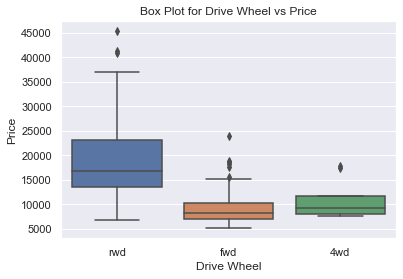

In [161]:
#boxplot
sns.boxplot(x="drivewheel",y="price",data=raw_dataset)

plt.title("Box Plot for Drive Wheel vs Price")
plt.xlabel("Drive Wheel")
plt.ylabel("Price")


plt.show()

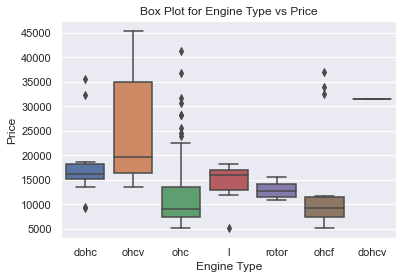

In [162]:
#boxplot
sns.boxplot(x="enginetype",y="price",data=raw_dataset)

plt.title("Box Plot for Engine Type vs Price")
plt.xlabel("Engine Type")
plt.ylabel("Price")

plt.show()

## Multivariate Analysis

### Using the formula

### $$ \rho _{XY} = corr(X, Y) $$
### $$ -3.0 \leq \rho _{XY} \leq +3.0 $$

In [163]:
## Correlation between symboling and price
plt_dataset['price'].corr(raw_dataset['symboling'])

-0.07997822464270347

<Figure size 1440x1080 with 0 Axes>

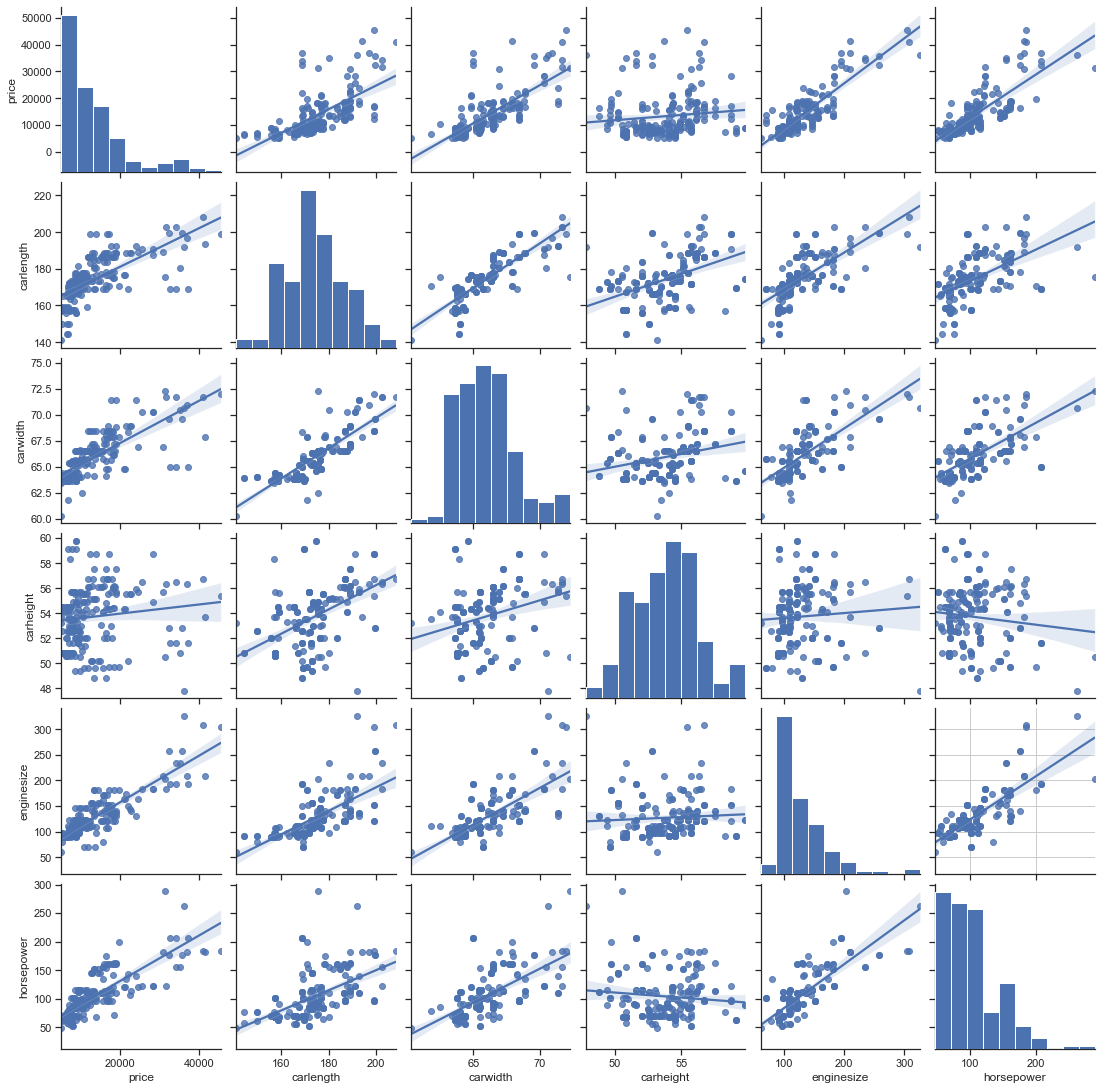

In [164]:
# pair plot with plot type regression
plt.figure(figsize=(20,15))
sns.set(style="ticks", color_codes=True)
sns.pairplot(plt_dataset,vars = ['price', 'carlength', 'carwidth', 'carheight', 'enginesize', 'horsepower'], kind = 'reg')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
             
plt.show()

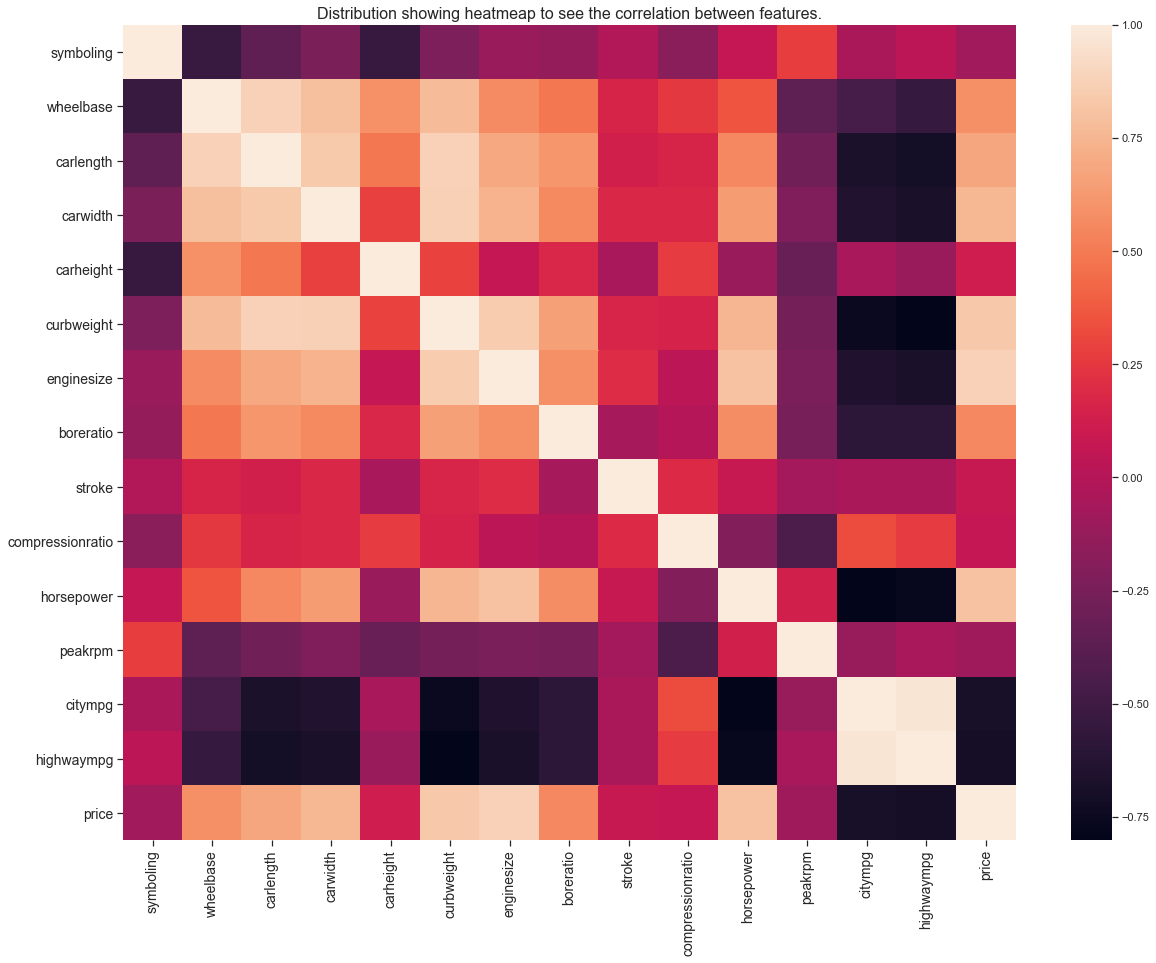

In [165]:
## heatmeap to see the correlation between features.
plt.figure(figsize=(20,15))
correlation = plt_dataset.corr(method='pearson')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.title("Distribution showing heatmeap to see the correlation between features.", fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()
# correlation

In [166]:
# using the numpy zero-like model to streamline the argurment from the heatmap
mask = np.zeros_like(plt_dataset.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

In [167]:
from scipy import stats
corr = stats.pearsonr(plt_dataset["price"], plt_dataset["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.483436573293965e-48
cor:		 0.8081388225362218


### Investigating the correlation of the dataset

In [168]:
correlation = plt_dataset.corr(method='pearson') # using pearson correlation
correlation

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


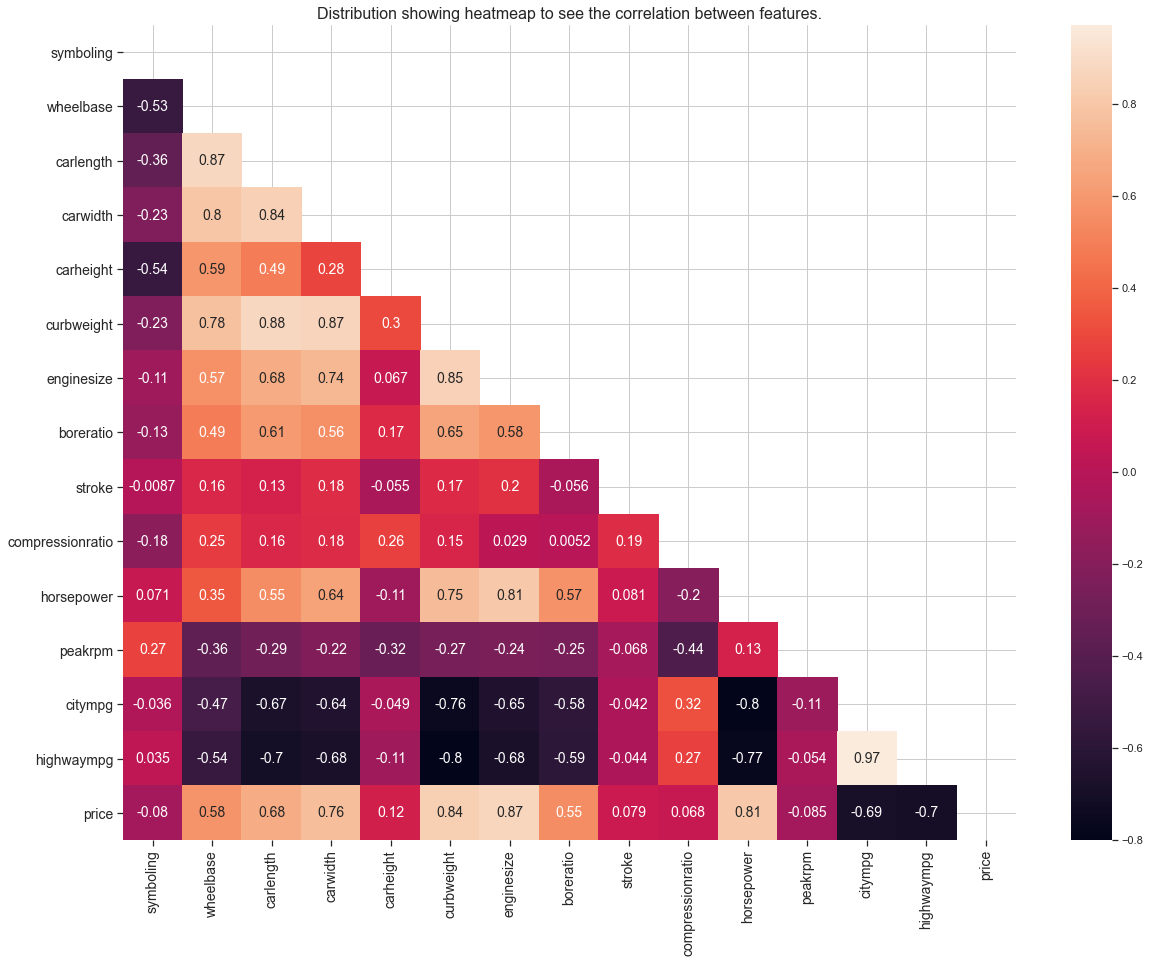

In [169]:
plt.figure(figsize=(20,15))
correlation = plt_dataset.corr(method='pearson')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.title("Distribution showing heatmeap to see the correlation between features.", fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()

In [170]:
# Selecting feature for the model
y = plt_dataset['price']
X = plt_dataset.drop(['price'], axis=1)

## Encoding

In [171]:
#initialize label encoder
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()

In [172]:
#for-if loop selects object columns and encodes
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = Lencoder.fit_transform(X[col])

In [173]:
#convert all float values to int
for col in X.columns:
    if X[col].dtype == 'float64':
        X[col] = X[col].apply('int64')

### Building a Regression Model

In [174]:
# splitting the training dataset to train and test groups for our model to learn and test on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

In [175]:
# Using Log Multivariable Regression
y_log = np.log(plt_dataset['price'])

### Using Multivariable Regression

#### Fitting the training data to our model 

In [176]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: ', regr.intercept_)

# Challenge: print out r-squared for training and test datasets
print('Training data r-squared: ', regr.score(X_train, y_train))

print('Test data r-squared:', regr.score(X_test, y_test))

Intercept:  -83803.43789168647
Training data r-squared:  0.9122151414660975
Test data r-squared: 0.7677957375188743


#### Score of this model

In [177]:
# Scoring the model to determine the percentage
print('The score of the regression model is: ', regr.score(X_test, y_test))

The score of the regression model is:  0.7677957375188743


#### Evaluting the p-values and coefficients of the model

In [178]:
X_incl_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_constant)
results = model.fit()

# results params
pd.DataFrame({'coef': results.params, 'p-values' : results.pvalues})

,coef,p-values
const,-83803.437892,2.986786e-05
symboling,-139.182504,6.511936e-01
CarName,-38.279242,2.225729e-08
fueltype,11581.444501,7.836169e-02
aspiration,381.614700,7.524213e-01
doornumber,-886.527072,2.319402e-01
carbody,-843.257229,6.175751e-02
drivewheel,-77.897845,9.026230e-01
enginelocation,8626.232474,1.606043e-03
wheelbase,122.723021,3.531886e-01


#### Evaluting the y-values of the model of the overall dependents values to the independent value - price

In [179]:
# predict the y values
y_pred = regr.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(15)

,Actual,Predicted
0,9895.0,10071.034329
1,18150.0,18457.018006
2,10795.0,13795.048584
3,11845.0,10700.029061
4,36000.0,47543.364351
5,8495.0,11661.002001
6,6295.0,8132.771535
7,11549.0,14080.705340
8,8058.0,3779.532397
9,22470.0,19446.770142


### Conducting a multiple linear regression model with a more fewer features

In [180]:
# Preparing the data
X = plt_dataset[['wheelbase','carlength','carwidth','carheight','enginesize','horsepower']]
y = plt_dataset[['price']]

# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Fitting the training data to our model
regr.fit(X_train, y_train)


#score of this model
print('The score of the regression model is: ', regr.score(X_test, y_test))


The score of the regression model is:  0.7084891728443907


### Observation

* The accuracy of this model is 71%. The table below shows the actual and predicted value for the target variable PRICE for this built model is as follows:

#### Evaluting the y-values of the model of the selected values to the independent value - price

In [181]:
# predict the y values
y_pred = regr.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,9895.0,11870.536640
1,18150.0,18534.571468
2,10795.0,10785.532224
3,11845.0,5118.294256
4,36000.0,46592.793864
5,8495.0,12224.872121
6,6295.0,5704.230125
7,11549.0,15562.072580
8,8058.0,6543.982046
9,22470.0,17197.163297


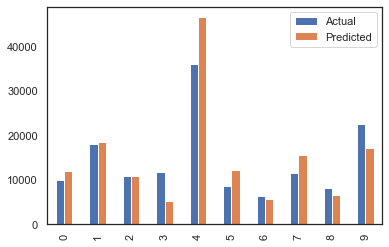

In [182]:
evaluate.head(10).plot(kind = 'bar')

*  Note that most of the predicted values are higher than the actual values.

## Action and Recommendation

- Mulitple linear regression model was employed for the prediction of the variable dependent on influencing the price of car. The model gave a regression score of 63% with queried with the entire feature against prices as compared to a selection of dependent variable which give a regression score of 71%. That is to say, with proper investigation of individual variable, a more accurate regression score will be obtained and compared among each other to understand the dependent with more influence to the price of car in the Nigeria market.

*

- OLS model was also implemented to obtain the p-value and coef which from the results, it was observed that certain features plays a significant role in sales in the Nigeria markets such as   aspiration, carheight, carwidth, boreratio, highwaympg, cylindernumber,  enginesize and others with low p-value such as horsepower, highwaympg, wheelbase, enginetype, enginelocation and boreratio.

*
- Concentration needs to be given to the doornumber, carbody, stroke and symboling as these feature if not properly handle could cost the company money in relation to competition among other car production company.
